# Basic example

This notebook analyses and visualizes the results of a `Optimas` optimization.

### Initialize the class for post processing and loads history data

In [1]:
import numpy as np
from optimas_pp.post_processing import PostProcOptimization

# Modify the path below, to point to your optimization
# pp = PostProcOptimization('/beegfs/desy/group/mpa/mpa1/delaossa/wake_t/lux_opt')
pp = PostProcOptimization('./optimas_data')

data file name:  libE_history_after_sim_100.npy
Varying parameters:  ['beam_i0', 'beam_i1']
Analyzed quantities: ['med', 'mad_rel', 'q', 's_fwhm']


When only the path is passed to PostProcOptimization, it would try to find out the specific variables of your optimization by searching the `varying_parameters.py` file.
If not present, the user would need to tell manually which are those, e.g.: `pp = PostProcOptimization('path', varpars=['x0', 'x1', ...])`

### Plotting optimization run versus time

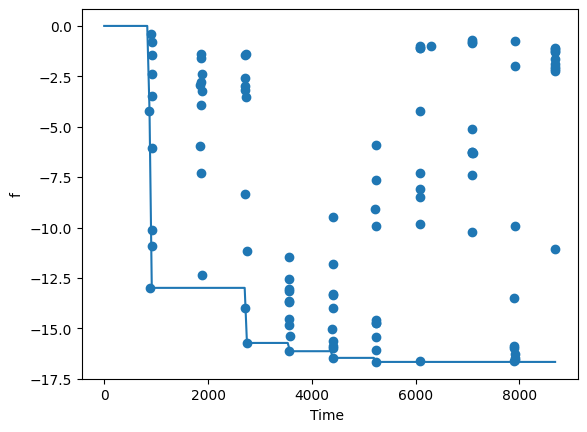

In [2]:
pp.plot_optimization()
t0 = np.linspace(0, pp.get_df()['returned_time'].max(), 200 )
pp.get_trace(plot=True, t_array=t0);

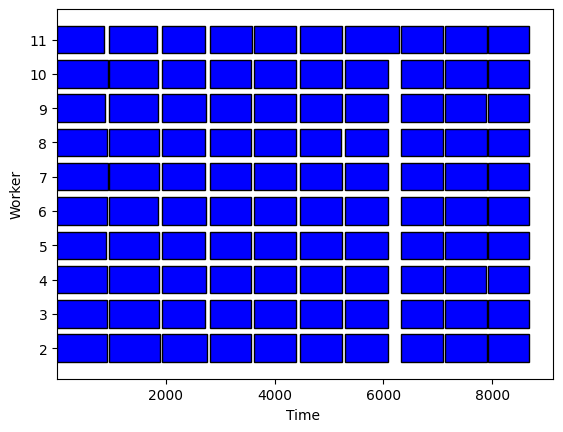

In [3]:
pp.plot_worker_timeline()

### Plotting history file

['f', 'beam_i0', 'beam_i1']


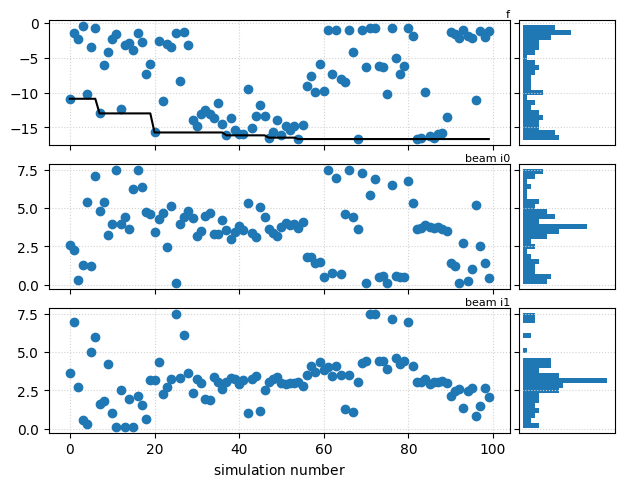

In [4]:
pp.plot_history()

Selecting according to the condition:  f < -15.000000


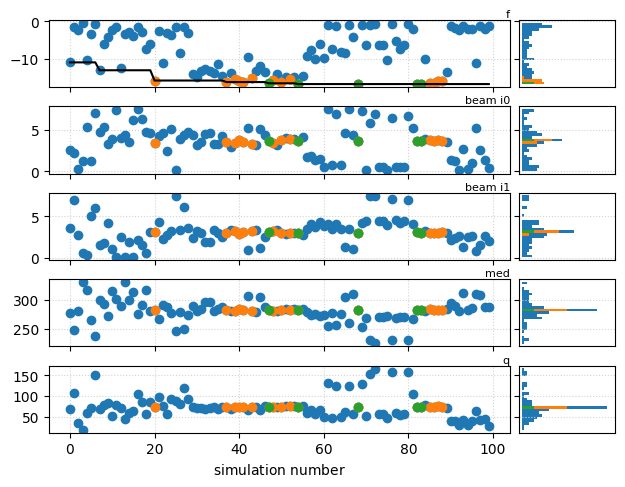

In [5]:
# manually set the parameters to show, select a sub-sample, show top scoring simulations
pp.plot_history(parnames=['f', 'beam_i0', 'beam_i1', 'med', 'q'], select={'f': [None, -15]}, top=5)

Selecting according to the condition:  f < -15.000000


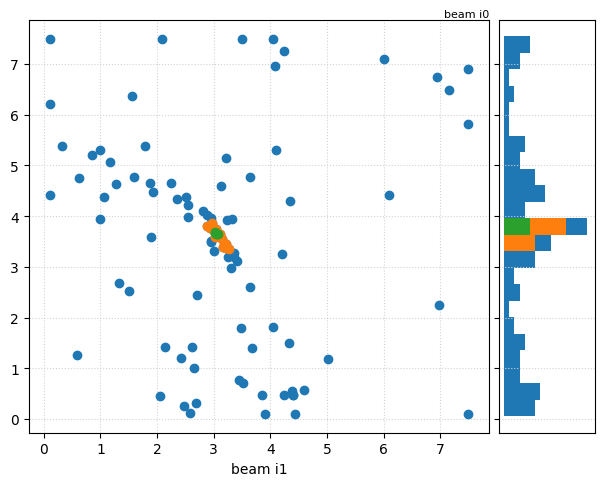

In [6]:
pp.plot_history(parnames=['beam_i0'], xname='beam_i1', select={'f':[None, -15]}, top=5)

### Show GP model

In [7]:
# Use data present in the history file to build a GP model with Ax.
# By default, the model is build for the score function `f`
mm = pp.build_model()

[INFO 04-21 13:11:05] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='beam_i0', parameter_type=FLOAT, range=[0.1, 7.5]), RangeParameter(name='beam_i1', parameter_type=FLOAT, range=[0.1, 7.5])], parameter_constraints=[]).
[INFO 04-21 13:11:05] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 2.601658, 'beam_i1': 3.636447}] as trial 0.
[INFO 04-21 13:11:05] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 2.248111, 'beam_i1': 6.97091}] as trial 1.
[INFO 04-21 13:11:05] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 0.316307, 'beam_i1': 2.691942}] as trial 2.
[INFO 04-21 13:11:05] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 1.263291, 'beam_i1': 0.58983}] as trial 3.
[INFO 04-21 13:11:05] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 5.385431, 'beam_i1': 0.317052}] as trial 4.
[INFO 04-21 13:11:05] ax.core.experiment: Attached custom paramet

[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 0.47742, 'beam_i1': 3.851158}] as trial 60.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 7.5, 'beam_i1': 4.045896}] as trial 61.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 0.771322, 'beam_i1': 3.452772}] as trial 62.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 6.971094, 'beam_i1': 4.085671}] as trial 63.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 0.717799, 'beam_i1': 3.52093}] as trial 64.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 4.627789, 'beam_i1': 1.279859}] as trial 65.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterizations [{'beam_i0': 7.5, 'beam_i1': 3.491153}] as trial 66.
[INFO 04-21 13:11:06] ax.core.experiment: Attached custom parameterization

Plotting the model in the beam_i1 vs beam_i0 plane


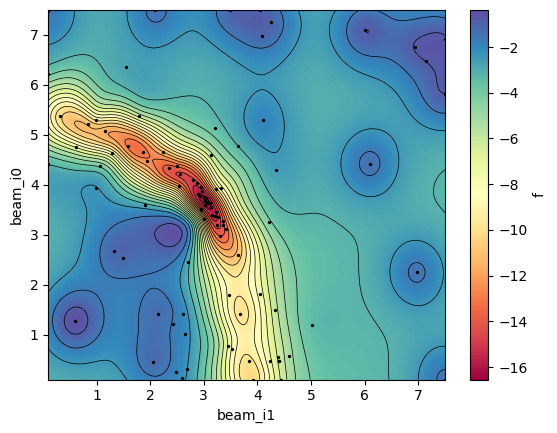

In [8]:
# Plot the model in 2D. 
# One can specify manually by setting the arguments `xname` and `yname` in `plot_model()`
# By default it takes the two first varying parameters in the list.
# The rest of parameters are fixed to the optimal value.
mm.plot_model(xname='beam_i1', yname='beam_i0', cmap='Spectral')

#### Get optimum point data

In [9]:
# Get optimum according the model 
# (this does not necessarily coincides with the minimum from data)
best_arm, best_point_predictions = mm.model.model_best_point()
best_pars = best_arm.parameters
print(best_arm)
print(best_pars)

Arm(name='83_0', parameters={'beam_i0': 3.670100437277201, 'beam_i1': 3.0246930851729474})
{'beam_i0': 3.670100437277201, 'beam_i1': 3.0246930851729474}


In [10]:
# Alternative: evaluate the model over the data sample
df = pp.get_df()
sample = df[pp.varpars] # Use history data as the sample to evaluate
f, _ = mm.evaluate_model(sample)
df['fm'] = f  # add model evaluation to data as column
idx_best_data = df['f'].idxmin()  # get index of the data point with smallest f
idx_best_model = df['fm'].idxmin()  # get index of the data point with smallest model f

# Select variable list to show
varlist = ['f', 'fm', 'beam_i0', 'beam_i1', 'med', 'mad_rel', 'q']

print('\ndata index where model is minimum: ', idx_best_model)
# print(sample.loc[idx_best_model])
for var in varlist:
    print('%10s = %10f' % (var, df.loc[idx_best_model][var]))

print()
print('data index where f is minimum: ', idx_best_data)
# print(sample.loc[idx_best_data])
for var in varlist:
    print('%10s = %10f' % (var, df.loc[idx_best_data][var]))



data index where model is minimum:  83
         f = -16.558818
        fm = -16.566073
   beam_i0 =   3.670100
   beam_i1 =   3.024693
       med = 282.685832
   mad_rel =   0.519491
         q =  73.997109

data index where f is minimum:  54
         f = -16.667123
        fm = -16.514675
   beam_i0 =   3.693381
   beam_i1 =   3.021622
       med = 282.680687
   mad_rel =   0.516917
         q =  74.227208
